In [2]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.oauth2 import service_account
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import dtale

# json credentials for google cloud access
credentials = service_account.Credentials.from_service_account_file("C:/Users/jsbae/Downloads/DSCI 400-73f3876225aa.json")

# Instantiates a client
client = language.LanguageServiceClient(credentials=credentials)

# The text to analyze
text = u'Wow! How is everyone doing on this wonderful day!'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))

# The magnitude of a document's sentiment indicates how much emotional content is present within the document,
# and this value is often proportional to the length of the document.
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

Text: Wow! How is everyone doing on this wonderful day!
Sentiment: 0.5, 1.0


In [3]:
"""
TODO: Look at the sentences that we highlight and see if they output any unusual sentiment values

Clearly Positive:	"score": 0.8, "magnitude": 3.0
Clearly Negative:	"score": -0.6, "magnitude": 4.0
Neutral:	        "score": 0.1, "magnitude": 0.0
Mixed:            	"score": 0.0, "magnitude": 4.0
"""

def sentimentAnalysis(doc_num):
    """
    This function takes in a document number in .txt and outputs a pandas dataframe that lists the magnitude and score 
    of all sentences
    :param doc_num: document number
    :return: pandas datafame with the index of each sentence corresponding to a score and magnitude rating
    """
    # read file won't tokenize??
    text_file = open('C:/Users/jsbae/financialsummary/resources/filtered/' + str(doc_num) +'.txt', encoding="utf-8").read()
    text_file = nltk.sent_tokenize(text_file)
    i = 0
    data_list = list()
    for line in text_file:
        document = types.Document(
            content=line,
            type=enums.Document.Type.PLAIN_TEXT)
        sentiment = client.analyze_sentiment(document=document).document_sentiment
        
        #print('Text: {}'.format(line))
        #print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
        
        sentiment_data = (i, sentiment.score, sentiment.magnitude)
        data_list.append(sentiment_data)
        i += 1
    
    
    sentiment_df = pd.DataFrame(data=data_list, columns=['Index', 'Score', 'Magnitude'])
    sentiment_df = sentiment_df.sort_values(by=['Score', 'Magnitude'])
    
    return sentiment_df

In [6]:
# 423 valid sentences (for the apple dataframe)
apple_df = sentimentAnalysis(0)
some_df1 = sentimentAnalysis(1)
some_df2 = sentimentAnalysis(2)



NameError: name 'line' is not defined

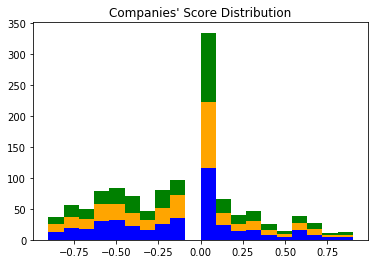

In [18]:
"""
Outcome: Mostly clearly negative sentences?? (mostly consists of negative sentences)
"""

plt.title("Companies' Score Distribution")
colors = ['blue', 'orange', 'green']
plt.hist((apple_df['Score'], some_df1['Score'], some_df2['Score']), histtype='bar', bins=20, stacked=True, color=colors)


([array([114.,  59.,   0.,  39.,  31.,   0.,  30.,  36.,   0.,  46.,  26.,
           0.,  23.,  18.,   0.,   0.,   1.,   0.,   0.,   0.]),
  array([221., 116.,   0.,  77.,  61.,   0.,  59.,  66.,   0.,  84.,  51.,
           0.,  44.,  34.,   0.,   0.,   2.,   0.,   0.,   0.]),
  array([333., 161.,   0., 120.,  91.,   0.,  96.,  97.,   0., 117.,  77.,
           0.,  67.,  50.,   0.,   0.,   3.,   0.,   0.,   1.])],
 array([0.        , 0.065     , 0.13      , 0.19499999, 0.25999999,
        0.32499999, 0.38999999, 0.45499998, 0.51999998, 0.58499998,
        0.64999998, 0.71499997, 0.77999997, 0.84499997, 0.90999997,
        0.97499996, 1.03999996, 1.10499996, 1.16999996, 1.23499995,
        1.29999995]),
 <a list of 3 Lists of Patches objects>)

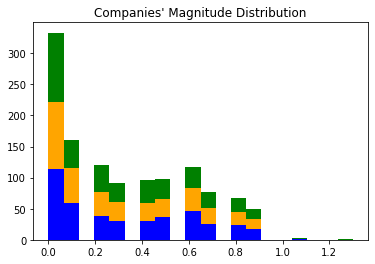

In [19]:
"""
Outcome: Mostly non-indicate of any positive of negative sentiment?? (most sentences do not have a sentiment reading)
"""

plt.title("Companies' Magnitude Distribution")
plt.hist((apple_df['Magnitude'], some_df1['Magnitude'], some_df2['Magnitude']), histtype='bar', bins=20, stacked=True, color=colors)


In [9]:
# this just displays the dataframe as an excel spreadsheet
dtale.show(apple_df)
